Show image iteration [0, 93500, 187000] / 187500


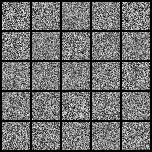

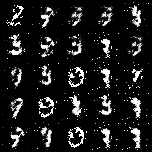

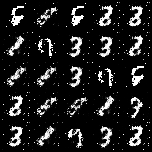

In [2]:
from IPython.display import display, Image

image_ids = [0, 93500, 187000]
print(f'Show image iteration {image_ids} / 187500')
for image_id in image_ids:        
    display(Image(filename=f'./images/{image_id}.png'))

/tmp/ipykernel_2575496/3943920380.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load('mnist_generator.pt'))


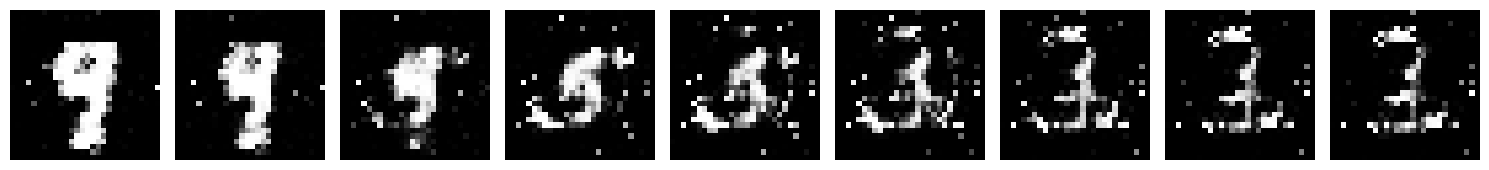

In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from my_gan import Generator

def interpolate_and_generate(generator, z1, z2, steps=9):
    alphas = np.linspace(0, 1, steps)
    interpolated_images = []
    
    generator.eval()
    with torch.no_grad():
        for alpha in alphas:
            # 线性插值
            z = (1-alpha) * z1 + alpha * z2
            # 生成图像
            fake = generator(z)
            img = fake.cpu().squeeze().numpy()
            img = (img + 1) / 2
            interpolated_images.append(img)
            
    return interpolated_images

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    latent_dim = 100
    
    generator = Generator(latent_dim).to(device)
    generator.load_state_dict(torch.load('mnist_generator.pt'))
    
    z1 = torch.randn(1, latent_dim).to(device)
    z2 = torch.randn(1, latent_dim).to(device)
    
    images = interpolate_and_generate(generator, z1, z2, steps=9)
    
    plt.figure(figsize=(15, 2))
    for i, img in enumerate(images):
        plt.subplot(1, 9, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('interpolation.png')
    plt.show()

if __name__ == "__main__":
    main()